In [1]:
%load_ext autoreload
%autoreload 2
%load_ext tensorboard

import torch
import matplotlib.pyplot as plt
import numpy as np

In [126]:
from save_load import set_logging
from config import CONFIG
from model import Deep_Linear_svd, Deep_Linear_simple, Deep_Linear, get_weight_decay, sig_factor
from train import main, train, save_config, run_loops_main, run_loops_plot, get_db, get_base_path, OrderedDict, CONFIG, PROBLEM_CONFIG #, Multitask_CONFIG # OPTIM_CONFIG, default_optim, default_problem #, get_steps, get_values,  

In [107]:
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as F

                
class Deep_Linear(nn.Module):
    def __init__(self, n_in = 5, depth=1, init_scale=1, device='cuda', lr=1, weight_decay=0, symmetric=True, **kwargs): #n_data = None):
        super().__init__()
        n_out = n_in
        layers = [n_in] * (depth+1)
        module_list = [nn.Linear(f_in, f_out, bias=False) for (f_in, f_out) in zip(layers, layers[1:])]  

        self.depth = depth  
        self.weight_decay=weight_decay #*lr*depth
        self.shared_layer = nn.Sequential(*module_list)
        self.init_weights(init_scale) #, _log)

        u, s, v = torch.rand(n_in, n_out).svd()
        s_ = torch.exp(torch.linspace(1,-5, min(n_in, n_out)))
#         if symmetric:
#             W = v * s_ @ v.t()
#         else:
        W = v * s_ @ u.t()
        self.w_gt = torch.tensor(W, device = device)        
        
    def params(self, task_lr=None): #, dict_out=False):
        return self.shared_layer.parameters()
        
    @property
    def shared_weight(self):
        for i, layer in enumerate(self.shared_layer.children()):
            W = layer.weight if i==0   else layer.weight @ W
        return W
    
    @property
    def weight_loss(self):
        l=0
        for i, layer in enumerate(self.shared_layer.children()):
            l += layer.weight.norm()**2
        return l
        
    
    @property
    def e2e(self):
        return self.shared_weight
    
    def train_loss(self):
        return (self.w_gt.T - self.e2e).pow(2).sum() + self.weight_decay*self.weight_loss
    
    def test_loss(self):
        return self.train_loss()
    
    ############################
    
    def init_weights(self, init_scale): #, _log):

        scale = init_scale**(1/depth)
        for param in self.shared_layer.parameters():  #self.parameters():
            nn.init.eye_(param)
            param.data.mul_(scale)
        

In [118]:

def get_model(config):
#     print(config.device)
    model = Deep_Linear(config,**vars(config.problem)).to(config.device)
#     model = Deep_Linear_simple(**{**vars(config), **vars(config.problem)}).to(config.device)
#     model = Deep_Linear_svd(**{**vars(config), **vars(config.problem)}).to(config.device)
    if not hasattr(model,'problem'):
        model.problem=None
    return model


In [146]:
# problem_params = 'svd_learn'
depth=5
sig_cutoff = 1.4e-1*2
weight_decay = get_weight_decay(sig_cutoff, depth)
# weight_decay = 0
loop_params = {} 

# lr0 = 2
# lr = lr0

# problem_params = 'SVD' 
problem_params = dict(name = 'SVD',  n_in = 20,)
params = dict(problem = problem_params,              
              loop_params=loop_params,
              experiment = 'svd_learn_test94', 
              n_record = 10,
              init_scale = 0.1, 
              n_dev_iters =50,
              weight_decay = weight_decay,
              clip_val_=0.01, #0.001,
              
              
              depth = depth, #[2], #[1,2,3,4], #[2,3,4,5],#                     weight_decay =  [0e-6], # [1e-5], # [1e-2, 1e-4, 1e-6], #  [ 0.001,  0.0003, 0.0001] 
              wide = True, #, False],
              
              n_singulars_save = 30,
#               optimizer = 'SGD', 
#               optimize_task = True,
#               normalize = True,
              
#               lr = 1/2/4, momentum = 0.0,  n_iters = 100, #5000, #2*5000,
              lr = 1, momentum = 0.0,  n_iters = 1800, #5000, #2*5000,
#               lr = 2, momentum = 0.80,  n_iters = 2500, #5000, #2*5000,
              
              # noise = 0,
              )


In [147]:
weight_decay

0.045263864301878814

In [148]:
config = CONFIG(**params)  # (problem=problem_params)
_writer, _log, tensorboard_path = set_logging(config,{})
save_config(config, tensorboard_path, filename = 'config.json', pop_list=['loop_params'])
model = get_model(config)
_log.info(model)


/run0


/disk2/Project/DeepMultitask/deep_factor/model.py:455: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  #             W = v * s_ @ v.t()


In [149]:


train_loss, test_loss = train(config, model, _writer, _log)

# for l in model.shared_layer:
#     print(l.weight)


# print(model.shared_weight)


In [150]:
_writer.close()

log_folder = get_base_path(config)
# print(log_folder)
db = None
db = get_db(log_folder, db)

Loading /disk2/Project/DeepMultitask/deep_factor/results/SVD/svd_learn_test94


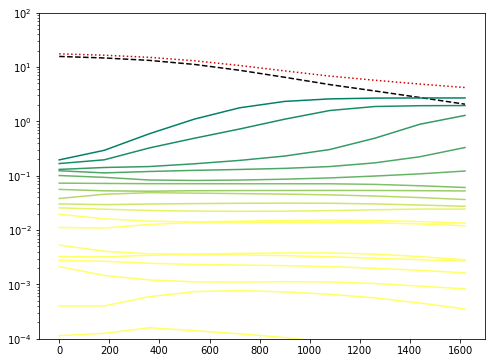

In [151]:
from save_load import make_0_plot
make_0_plot(db)

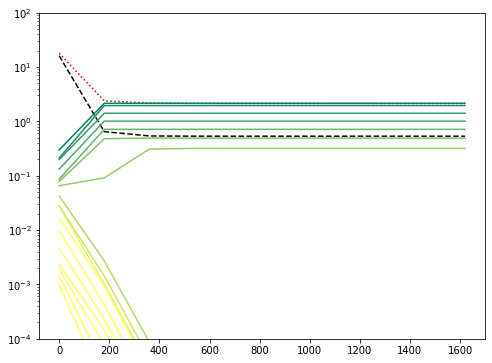

In [145]:
from save_load import make_0_plot
make_0_plot(db)

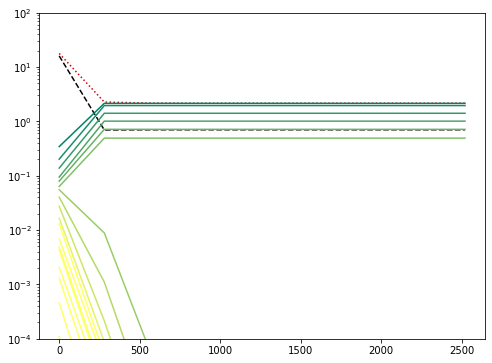

In [138]:
from save_load import make_0_plot
make_0_plot(db)

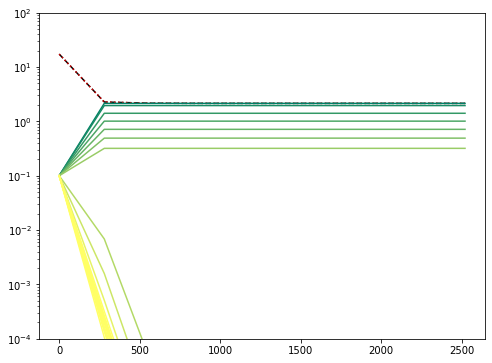

In [117]:
from save_load import make_0_plot
make_0_plot(db)

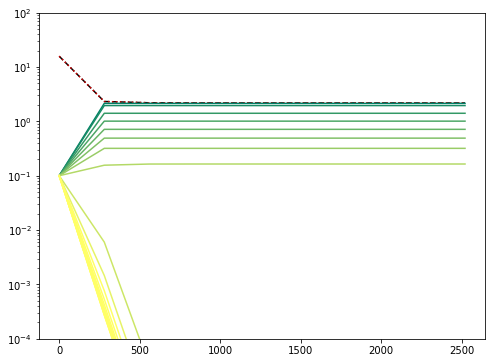

In [106]:
from save_load import make_0_plot
make_0_plot(db)

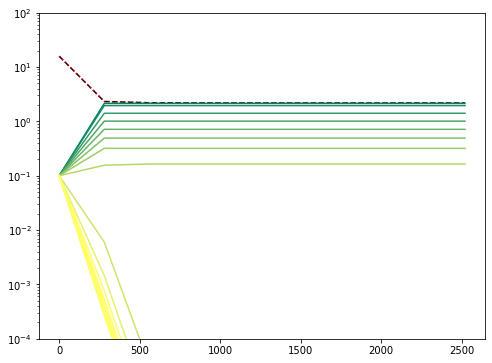

In [56]:
from save_load import make_0_plot
make_0_plot(db)

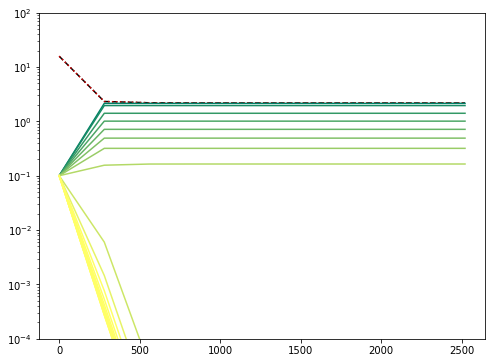

In [16]:
from save_load import make_0_plot
make_0_plot(db)

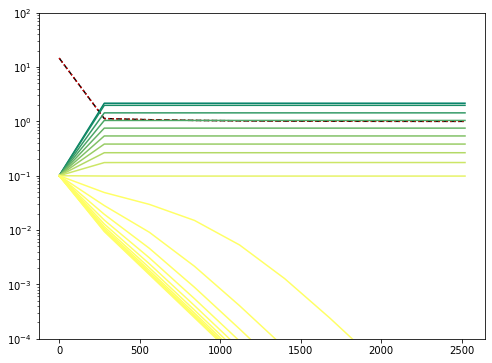

In [10]:
from save_load import make_0_plot
make_0_plot(db)

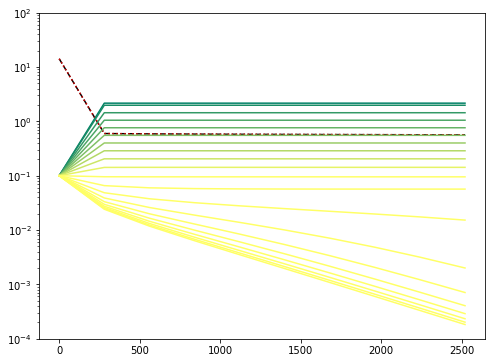

In [24]:
from save_load import make_0_plot
make_0_plot(db)

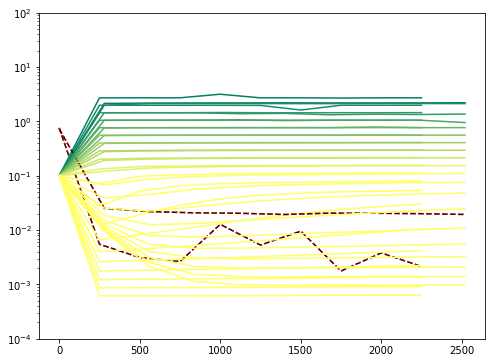

In [329]:
from save_load import make_0_plot
make_0_plot(db)

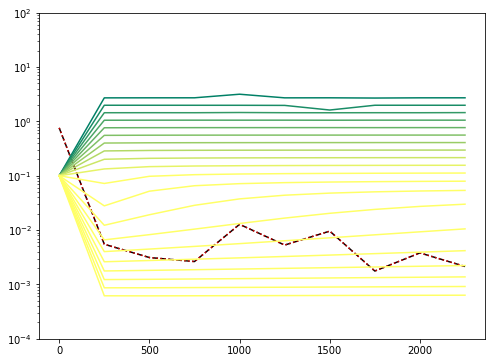

In [323]:
from save_load import make_0_plot
make_0_plot(db)

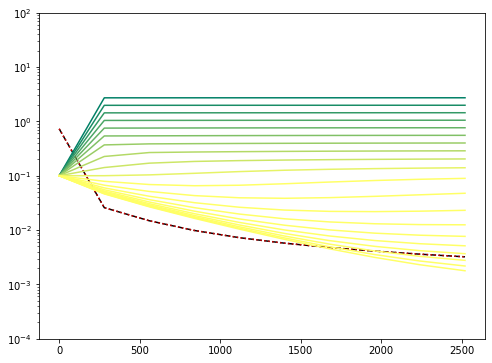

In [317]:
from save_load import make_0_plot
make_0_plot(db)

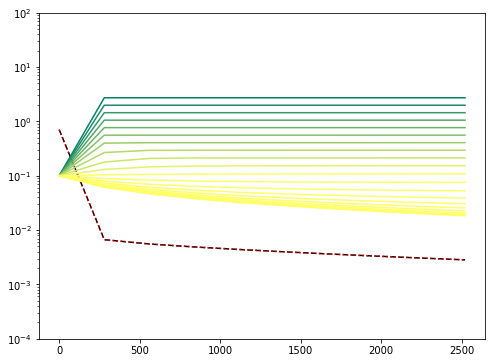

In [311]:
from save_load import make_0_plot
make_0_plot(db)

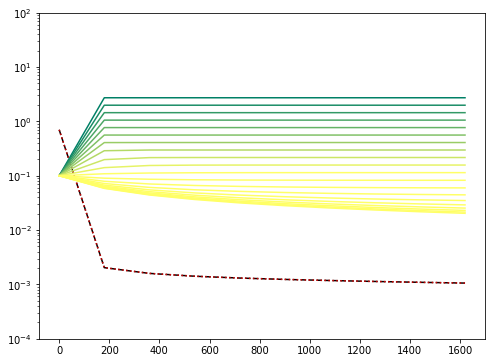

In [279]:
from save_load import make_0_plot
make_0_plot(db)

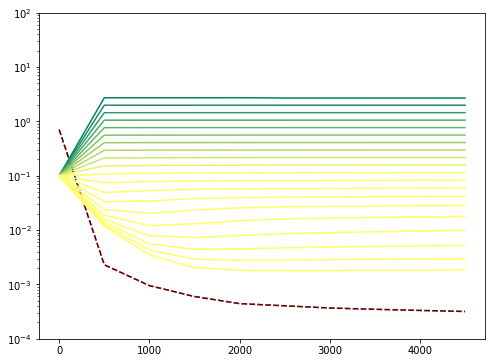

In [266]:
from save_load import make_0_plot
make_0_plot(db)

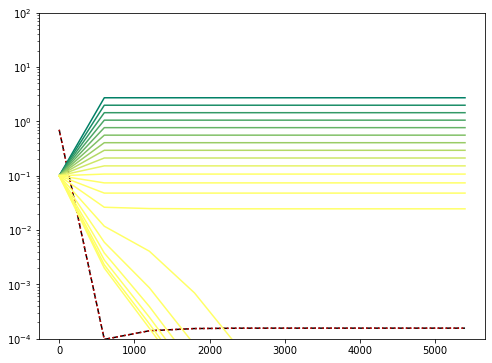

In [174]:
from save_load import make_0_plot
make_0_plot(db)

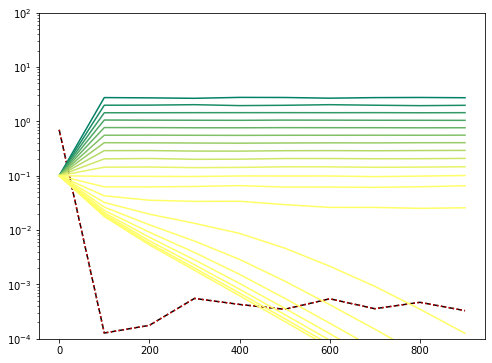

In [65]:
from save_load import make_0_plot
make_0_plot(db)